In [1]:
import scipy.io
data = scipy.io.loadmat('wittig_data.mat')
spectra=data['A'] #spectra with shape samples*no of wavelengths
c0=data['c0'][0] #initial concentration of species(S)
N=data['N'] #Stoichiometric matrix R*S
tau=data['tau'].T[0] #array of timestamps
lamdas=data['lamda'] #Wavelengths array
df=data['df'][0][0] #dilution factor
n=3 #no of params
A=spectra

In [2]:
N

array([[-1.  ,  0.  , -1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ],
       [-4.82, -4.82,  0.  ,  0.  ,  0.  ,  0.  ,  4.82,  1.  ,  3.82,
         0.  ,  4.82],
       [-1.  ,  0.  ,  0.  ,  0.  ,  0.  , -1.  ,  1.  ,  0.  ,  0.  ,
         1.  ,  1.  ]])

In [3]:
#C - list of conc of species
#t - time
#pars -list of parameters

def model(C,t,pars):
    M=np.array([[pars[0]*C[0]*C[0]],[pars[1]*C[0]],[pars[2]*C[0]*C[5]]])
    dcdt=(N.T)@M
    return dcdt.flatten().tolist()

In [4]:
#importing KineParEs package
from KineParEs import *
#creating parameter estimation object
# par=par_estimate(A,c0,N,tau,lamdas,n,'2')
par=par_estimate(A,c0,N,tau,lamdas,n,"custom",model)

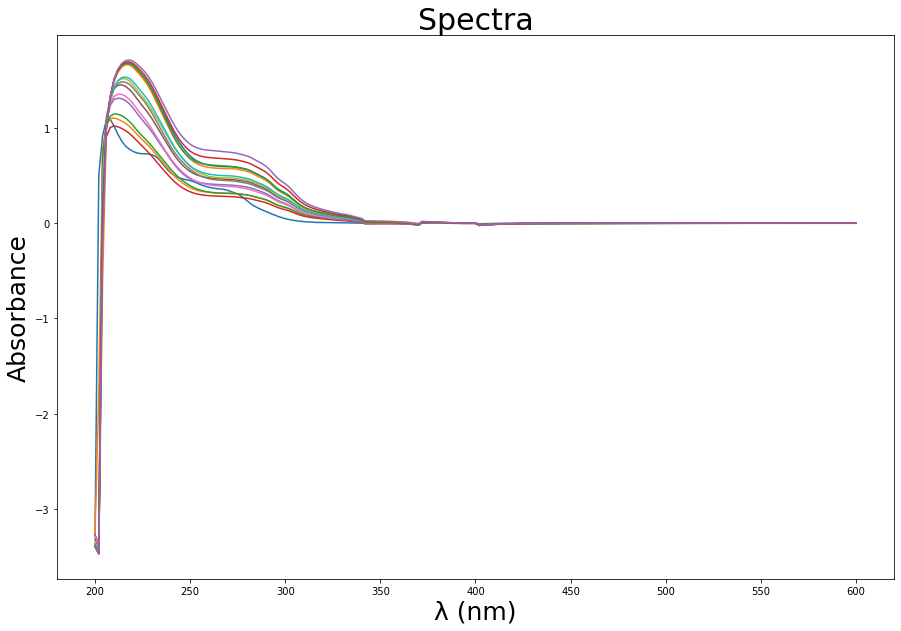

In [5]:
par.spectrum_plot()

In [6]:
#checks input dimensions of all data given
par.preprocess()
#setting req part of spectrum, removing first 100 and last 20 wavelegths
par.subset_slice(100,2)

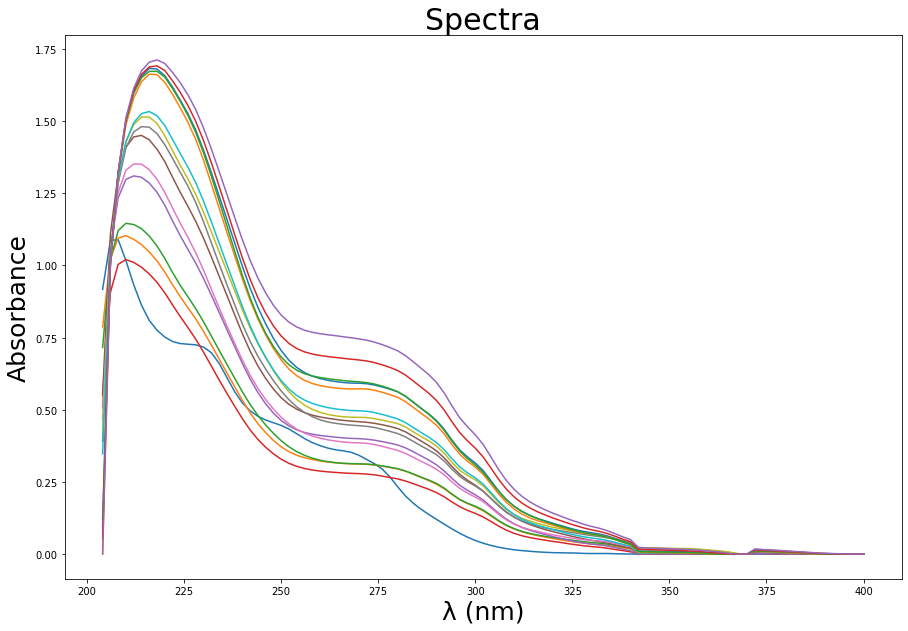

In [7]:
par.spectrum_plot()

In [8]:
#Savitzky-Golay smoothing filter
par.savitzky_golay(window_size=5,order=3) 

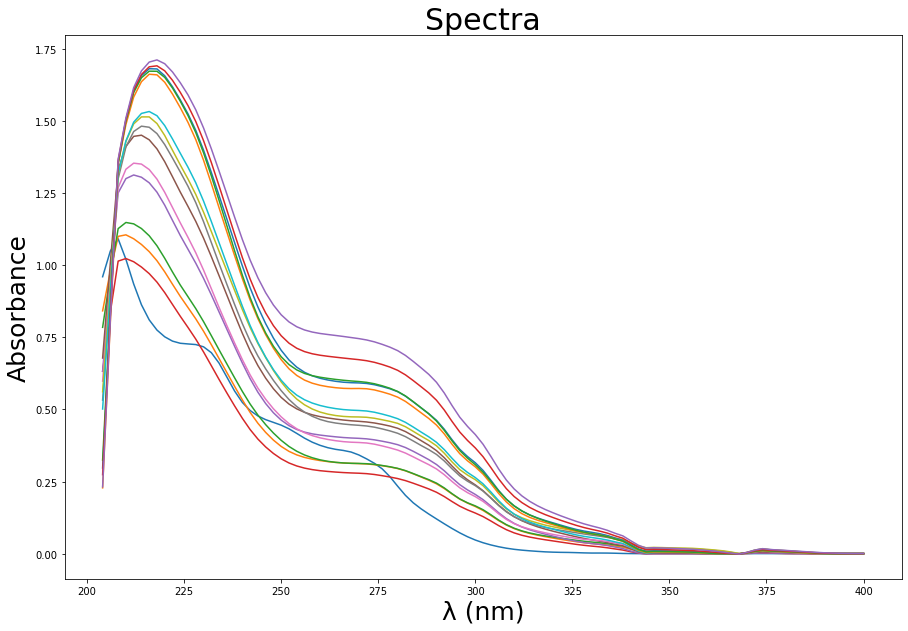

In [9]:
par.spectrum_plot()

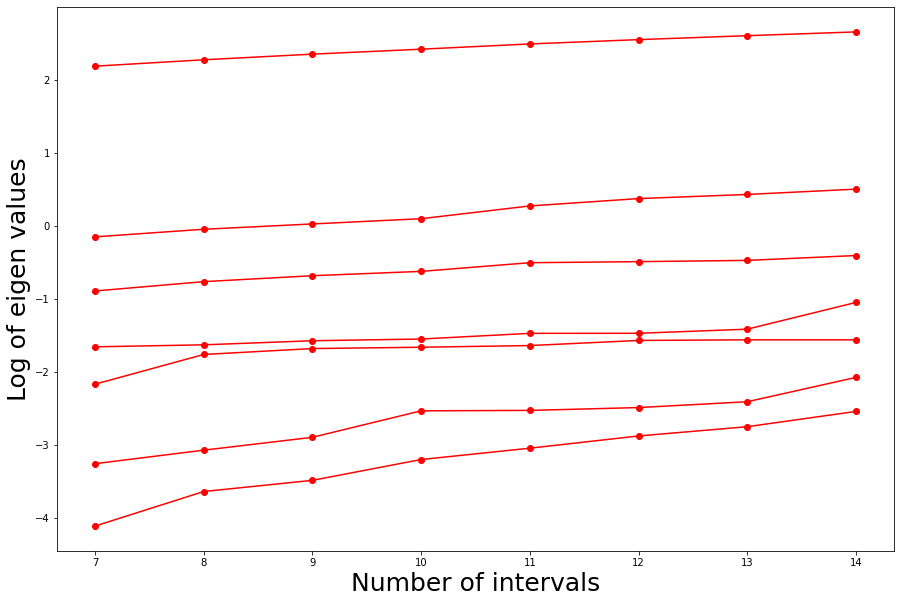

In [10]:
par.forward_EFA(1,comp=7)

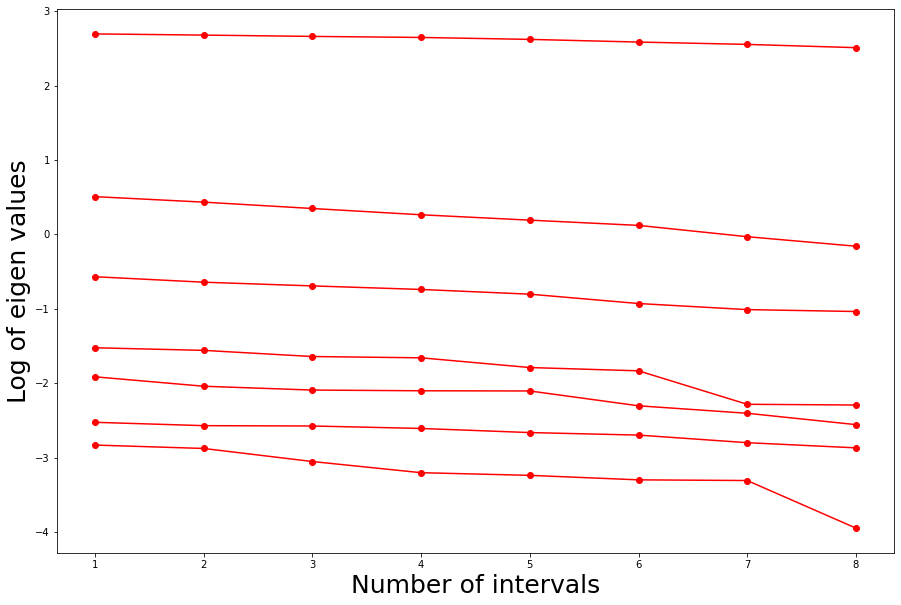

In [11]:
par.backward_EFA(1,comp=7)

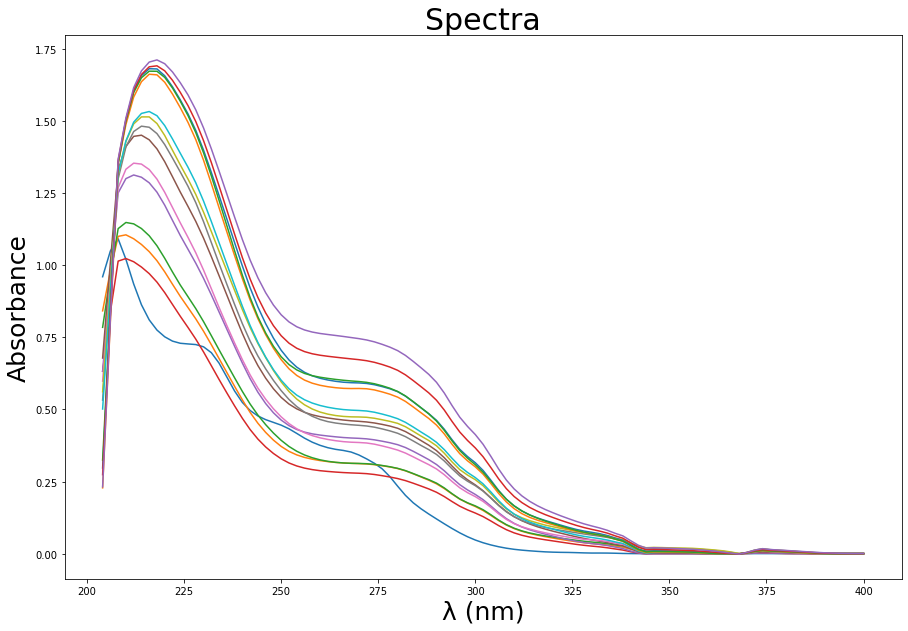

In [12]:
par.spectrum_plot()

In [13]:
values=par.optim(bounds=((0.05, 0.1), (0.001, 0.005), (0.01, 0.05)),niters=500)
values
#values vary from paper because of not including dilution factor.

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:01<00:00,  4.10it/s]


(array([0.05 , 0.001, 0.01 ]), 2.2094894240264433)

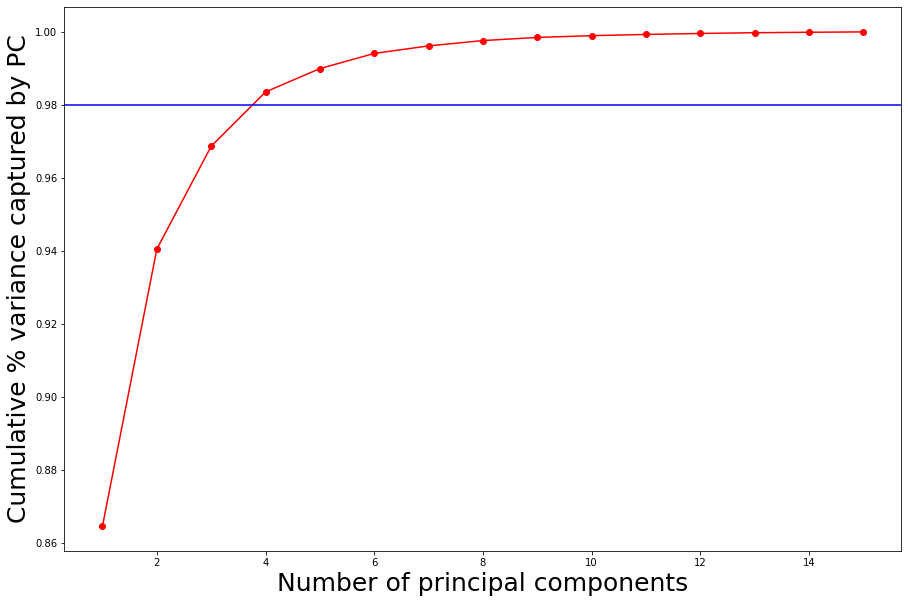

In [14]:
par.variance_ratio()

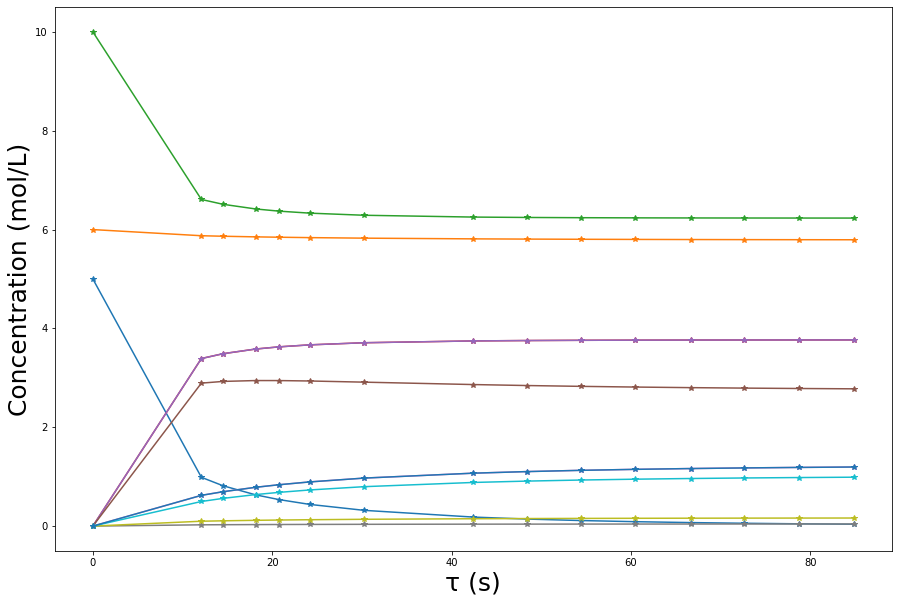

In [15]:
par.conc_profile(tuple(values[0]))

In [16]:
par.MSC()

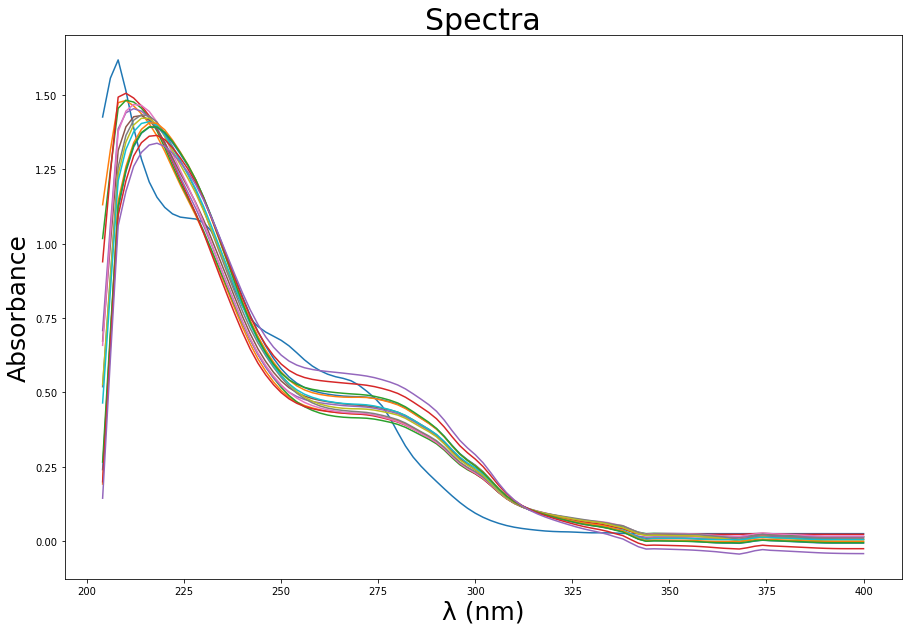

In [17]:
par.spectrum_plot()